# Pima Indians Diabetes 

# Table of contents  <a id='back'></a>
1.[Introduction](#intro)  
2.[Goals](#goals)  
3.[Steps](#steps)    
4.[Data Preprocessing](#data_prep)   
5.[Correlation between different variables ](#correlation)  
6.[Average measure of variables across different age groups ](#average)  
7.[Final Conclusion](#end)  

<a id='intro'></a>
## Introduction

<b>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.   
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic  
measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger  
database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.</b>

## Goals <a id='goals'></a>

<b>1.Look for any correlation between different variables.  
2.Study the trend of the variables for different age group.  
3.Conclusion based on influence of the variables on the `Outcome` variable.</b>

## Steps <a id='steps'></a>

<b>1.Data Preprocesing.  
2.Correlation matrix for different variables.  
3.Study the average measures across different age groups.  
4.Final Conclusion.</b>

[Back to Contents](#back)

### Imports and loading dataset.

In [32]:
#import different packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [33]:
#ignore warnings
warnings.filterwarnings("ignore")

In [34]:
# load the dataset
data_df=pd.read_csv('diabetes.csv')
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
#dataset information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<b>No missing values in the dataset.</b>

[Back to Contents](#back)

## Data Preprocessing.  <a id='data_prep'></a>

In [36]:
#look for value counts in each column.
for col in data_df.columns:
    display(data_df[col].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

0    500
1    268
Name: Outcome, dtype: int64

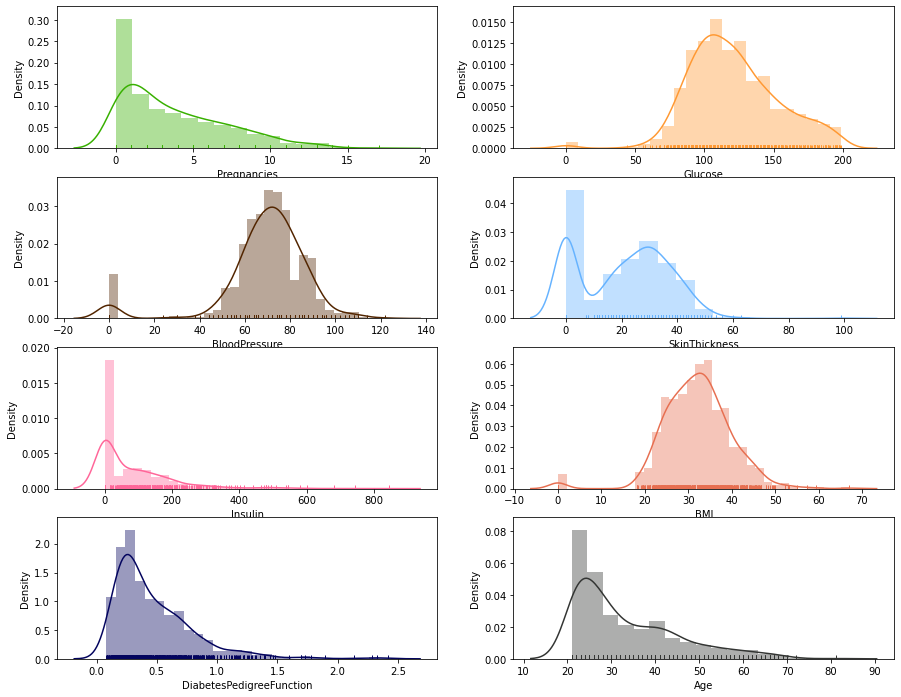

In [37]:
#Let’s visualize these 8 features provided in the dataset –

fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(data_df['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(data_df['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(data_df['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(data_df['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(data_df['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(data_df['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(data_df['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(data_df['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

<b>From the above plots, we see that there are 0 in some fields which are impossible to occur like BloodPressure, Glucose, Insulin.  
1.Insulin and SkinThickness have around 200-300 data with 0. We replace the 0 with average of the fields respectively.  
2.Glucose and BMI have way few(less than 10%) with ).So we ignore them in the data .</b>

In [38]:
#replace 0 with mean of the column(Insulin) values
data_df['Insulin'].replace(0, np.nan, inplace=True)

In [39]:
data_df['Insulin'].fillna(data_df['Insulin'].mean())

0      155.548223
1      155.548223
2      155.548223
3       94.000000
4      168.000000
          ...    
763    180.000000
764    155.548223
765    112.000000
766    155.548223
767    155.548223
Name: Insulin, Length: 768, dtype: float64

In [40]:
data_df['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [41]:
#replace 0 with mean of the column(SkinThickness) values
data_df['SkinThickness'].replace(0, np.nan, inplace=True)
data_df['SkinThickness'].fillna(data_df['SkinThickness'].mean())

0      35.00000
1      29.00000
2      29.15342
3      23.00000
4      35.00000
         ...   
763    48.00000
764    27.00000
765    23.00000
766    29.15342
767    31.00000
Name: SkinThickness, Length: 768, dtype: float64

In [42]:
#replace 0 with mean of the column(BloodPressure) values
data_df['BloodPressure'].replace(0, np.nan, inplace=True)
data_df['BloodPressure'].fillna(data_df['BloodPressure'].mean())

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64

In [43]:
#descriptive statistics for each column in the dataset.(checking for outliers)
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<b>We don't see much of a skewed data or outlier.</b>

In [44]:
#checking for  duplicates.
data_df[data_df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<b>Dataset is free from duplicate entries.</b>

[Back to Contents](#back)

## Correlation <a id='correlation'></a>

In [45]:
#correlation matrix
data_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.214178,0.100239,0.082171,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.221436,0.211354,0.580010,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.214178,0.221436,1.000000,0.226839,0.098272,0.258735,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.211354,0.226839,1.000000,0.184888,0.631959,0.115016,0.166816,0.259491
Insulin,0.082171,0.580010,0.098272,0.184888,1.000000,0.228328,0.130395,0.220261,0.303454
BMI,0.017683,0.221071,0.258735,0.631959,0.228328,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,-0.002805,0.115016,0.130395,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.330107,0.166816,0.220261,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.170589,0.259491,0.303454,0.292695,0.173844,0.238356,1.000000


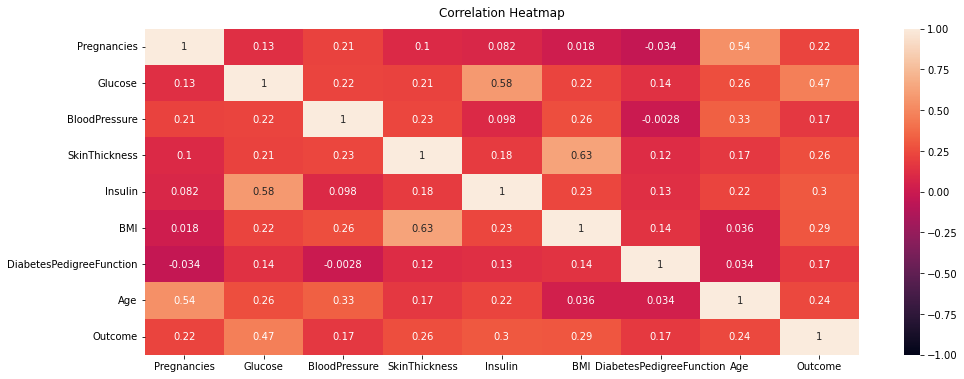

In [46]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<b>From the above heatmap, we don't see much correlation between the variables.  
The maximum correlation we see is only 0.5 - 0.6.  
Better correlation between Glucose, Insulin and glucose, outcome.  
This clearly shows that value of Glucose has some influence on the Outcome variable.</b>

[Back to Contents](#back)

## Average measure across different age groups. <a id='average'></a>

In [47]:
# The function returns the age group according to the age value, using the following rules:
def age_group(age):
    
    if (age > 20) & (age < 31):
        return '21-30'
    elif (age > 30) &(age < 41):
        return '31-40'
    elif (age > 40) & (age < 51):
        return '41-50'
    elif (age > 50) & (age < 61):
        return '51-60'
    elif (age > 60) & (age < 71):
        return '61-70'
    elif (age > 70) & (age < 81):
        return '71-80'
    elif (age > 80) & (age < 91):
        return '81-90'
    else:
        return 'invalid' 

In [48]:
data_df['AgeGroup'] = data_df['Age'].apply(age_group)
print(data_df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0           35.0      NaN  33.6   
1            1       85           66.0           29.0      NaN  26.6   
2            8      183           64.0            NaN      NaN  23.3   
3            1       89           66.0           23.0     94.0  28.1   
4            0      137           40.0           35.0    168.0  43.1   
5            5      116           74.0            NaN      NaN  25.6   
6            3       78           50.0           32.0     88.0  31.0   
7           10      115            NaN            NaN      NaN  35.3   
8            2      197           70.0           45.0    543.0  30.5   
9            8      125           96.0            NaN      NaN   0.0   

   DiabetesPedigreeFunction  Age  Outcome AgeGroup  
0                     0.627   50        1    41-50  
1                     0.351   31        0    31-40  
2                     0.672   32        1    31-

In [49]:
#Count of diabetics across different age groups
agegroup_diabetic_pivot=data_df.pivot_table(index='AgeGroup',values='Age', aggfunc='count',columns='Outcome').reset_index()
agegroup_diabetic_pivot

Outcome,AgeGroup,0,1
0,21-30,327.0,90.0
1,31-40,81.0,76.0
2,41-50,49.0,64.0
3,51-60,23.0,31.0
4,61-70,18.0,7.0
5,71-80,1.0,NaN
6,81-90,1.0,NaN


In [50]:
agegroup_diabetic_pivot.rename_axis(None,axis=0)
agegroup_diabetic_pivot

Outcome,AgeGroup,0,1
0,21-30,327.0,90.0
1,31-40,81.0,76.0
2,41-50,49.0,64.0
3,51-60,23.0,31.0
4,61-70,18.0,7.0
5,71-80,1.0,NaN
6,81-90,1.0,NaN


In [51]:
agegroup_diabetic_pivot.columns=['AgeGroup','NotDiabeticCount','DiabeticCount']
agegroup_diabetic_pivot

,AgeGroup,NotDiabeticCount,DiabeticCount
0,21-30,327.0,90.0
1,31-40,81.0,76.0
2,41-50,49.0,64.0
3,51-60,23.0,31.0
4,61-70,18.0,7.0
5,71-80,1.0,NaN
6,81-90,1.0,NaN


In [52]:
agegroup_diabetic_pivot['DiabeticCount']=agegroup_diabetic_pivot['DiabeticCount'].fillna(0)
agegroup_diabetic_pivot['DiabeticCount']=agegroup_diabetic_pivot['DiabeticCount'].astype('int')
agegroup_diabetic_pivot['NotDiabeticCount']=agegroup_diabetic_pivot['NotDiabeticCount'].astype('int')
agegroup_diabetic_pivot

,AgeGroup,NotDiabeticCount,DiabeticCount
0,21-30,327,90
1,31-40,81,76
2,41-50,49,64
3,51-60,23,31
4,61-70,18,7
5,71-80,1,0
6,81-90,1,0


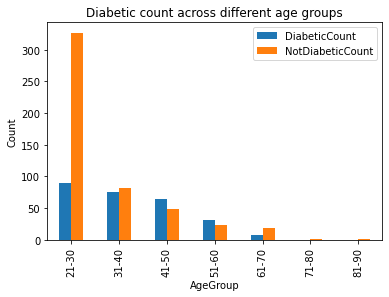

In [53]:
#plotting diabetic count across different age group
agegroup_diabetic_pivot.plot(kind='bar',x='AgeGroup',y=['DiabeticCount','NotDiabeticCount'])
plt.legend()
plt.ylabel('Count')
plt.title('Diabetic count across different age groups')
plt.show()

<b>Women in the age group 30-50 have higher count of diabetics.  
Young women in the age 21-30 has a low percentage(less than 30%) of diabetics dignosis.  
Women over the age 70 cannot be analyzed because of almost no supporting data.(only 1 available)</b>

[Back to Contents](#back)

In [54]:
#average of different varoiables across the various age groups
agegroup_average_pivot=data_df.pivot_table(index='AgeGroup',values=['Pregnancies','Glucose','BloodPressure','Insulin','SkinThickness','BMI'], aggfunc='mean').reset_index()
agegroup_average_pivot

,AgeGroup,BMI,BloodPressure,Glucose,Insulin,Pregnancies,SkinThickness
0,21-30,31.322062,68.962025,114.175060,140.624000,2.007194,27.795107
1,31-40,32.886624,74.046980,126.178344,162.743243,5.273885,31.310680
2,41-50,34.501770,77.532110,124.884956,162.166667,7.123894,31.300000
3,51-60,31.114815,80.055556,141.148148,273.840000,6.518519,29.250000
4,61-70,28.856000,78.080000,137.560000,185.000000,4.800000,37.250000
5,71-80,19.600000,NaN,119.000000,NaN,2.000000,NaN
6,81-90,25.900000,74.000000,134.000000,60.000000,9.000000,33.000000


In [55]:
#fill missing values with 0.
agegroup_average_pivot=agegroup_average_pivot.fillna(0)

In [56]:
#Transforming all the values to integers
agegroup_average_pivot['BMI']=agegroup_average_pivot['BMI'].astype('int')
agegroup_average_pivot['BloodPressure']=agegroup_average_pivot['BloodPressure'].astype('int')
agegroup_average_pivot['Glucose']=agegroup_average_pivot['Glucose'].astype('int')
agegroup_average_pivot['Insulin']=agegroup_average_pivot['Insulin'].astype('int')
agegroup_average_pivot['Pregnancies']=agegroup_average_pivot['Pregnancies'].astype('int')
agegroup_average_pivot['SkinThickness']=agegroup_average_pivot['SkinThickness'].astype('int')
agegroup_average_pivot

,AgeGroup,BMI,BloodPressure,Glucose,Insulin,Pregnancies,SkinThickness
0,21-30,31,68,114,140,2,27
1,31-40,32,74,126,162,5,31
2,41-50,34,77,124,162,7,31
3,51-60,31,80,141,273,6,29
4,61-70,28,78,137,185,4,37
5,71-80,19,0,119,0,2,0
6,81-90,25,74,134,60,9,33


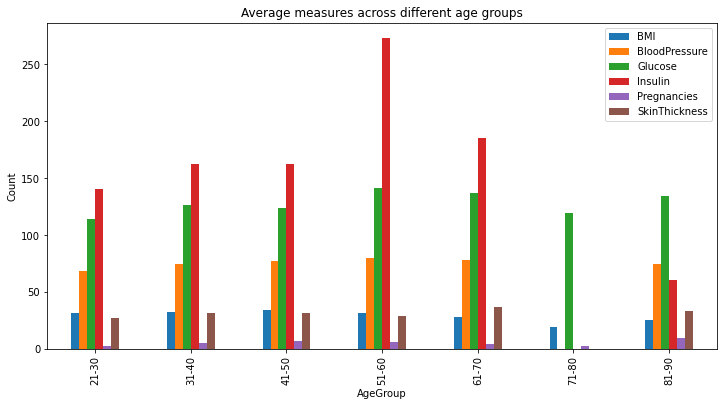

In [57]:
#plotting the average measure across different age groups
agegroup_average_pivot.plot(kind='bar',x='AgeGroup',y=['BMI','BloodPressure','Glucose','Insulin','Pregnancies','SkinThickness'],figsize=(12,6))
plt.legend()
plt.ylabel('Count')
plt.title('Average measures across different age groups')
plt.show()

<b>BMI, BloodPressure, Glucose and all other variables except Insulin seems to be consistent with age.  
Insulin apike  is clearly visible with the age group 51-60.  
</b>

[Back to Contents](#back)

## Final Conclusion     <a id='end'></a>


<b>Based on our analysis, we see that   
 <b>1.BMI, BloodPressure, Glucose and all other variables except Insulin seems to be consistent with age.    
    2.Insulin apike is clearly visible with the age group 51-60.    
    3.Women in the age group 30-50 have higher count of diabetics.  
    4.Young women in the age 21-30 has a low percentage(less than 30%) of diabetics dignosis.  
    5.Women over the age 70 cannot be analyzed because of almost no supporting data.(only 1 available).  
    6.we don't see much correlation between the variables from the heatmap created from correlation matrix.  
    7.The maximum correlation is 0.5 - 0.6.  
    8.Better correlation between Glucose, Insulin and glucose, outcome.This clearly shows that value of Glucose has some             influence on the Outcome variable.
    </b>

[Back to Contents](#back)